In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import datetime
from scipy import stats
import seaborn as sns
import folium
from IPython.display import HTML, display

In [3]:
crimes = pd.read_csv('Crimes_2016-2018.csv', sep=',', error_bad_lines=False)

PreProcessing

In [4]:
crimes.apply(lambda x: sum(x.isnull()))
crimes.apply(lambda x: len(x.unique()))

ID                      802836
Case Number             802728
Date                    352650
Block                    32405
IUCR                       353
Primary Type                33
Description                331
Location Description       152
Arrest                       2
Domestic                     2
Beat                       274
District                    24
Ward                        51
Community Area              79
FBI Code                    26
X Coordinate             63050
Y Coordinate            100544
Year                         3
Updated On                1846
Latitude                260289
Longitude               259696
Location                261254
dtype: int64

In [13]:
#crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
#crimes.drop(['Case Number','IUCR','FBI Code','Updated On','Location',
                  #'X Coordinate','Y Coordinate','Location'], inplace = True, axis = 1)
crimes = crimes.dropna(axis = 0, how = 'any')

## date conversion
crimes.Date = pd.to_datetime(crimes.Date)
crimes.index = pd.DatetimeIndex(crimes.Date)

In [14]:
crimes['Primary Type'] = pd.Categorical(crimes['Primary Type'])
crimes['Description'] = pd.Categorical(crimes['Description'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])

EDA

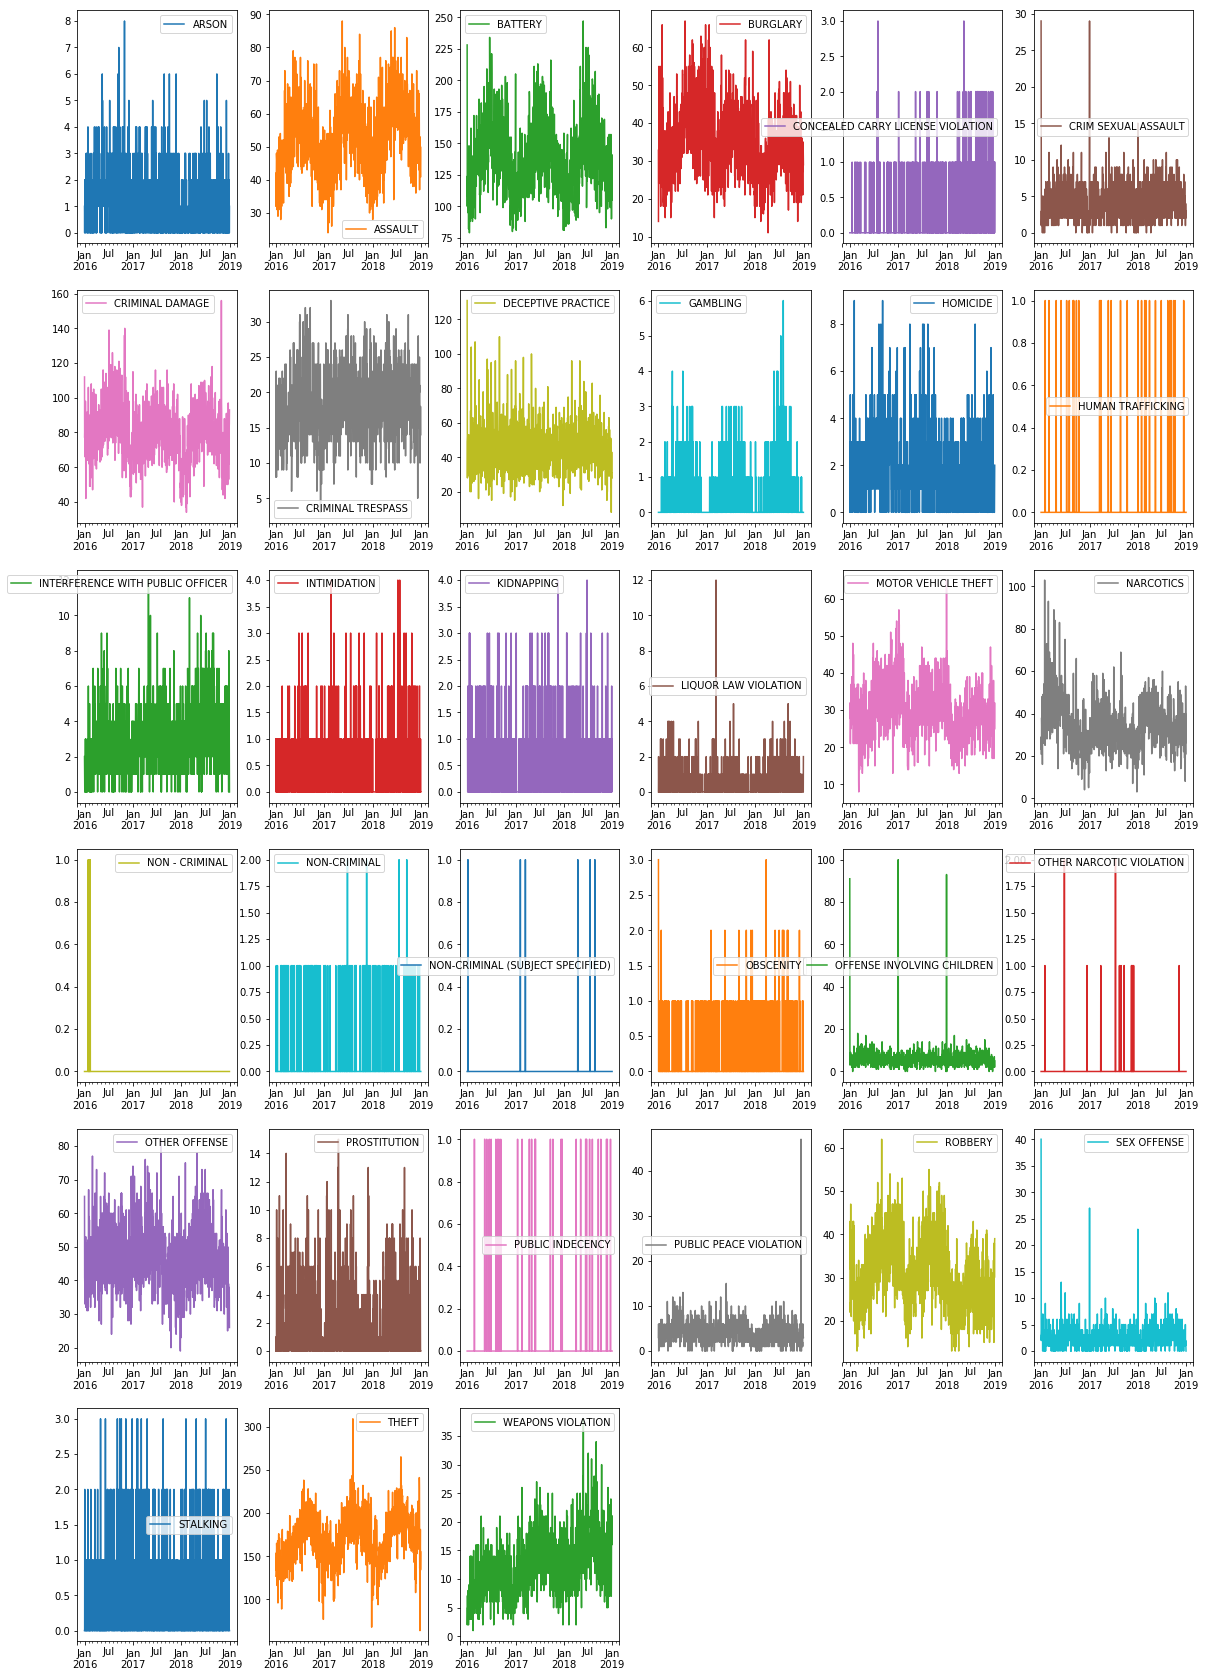

In [15]:
Crime_Data_date = crimes.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type', 
                                         index = crimes.index.date, fill_value = 0)
Crime_Data_date.index = pd.DatetimeIndex(Crime_Data_date.index)

Plot = Crime_Data_date.plot(figsize = (20,30), subplots = True, layout = (6,6),
                                  sharex = False, sharey = False)
plt.show()

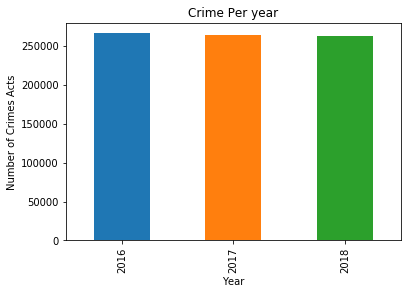

In [21]:
#crimes per year
crimes.groupby([crimes.index.year]).size().plot.bar()
plt.title('Crime Per year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()

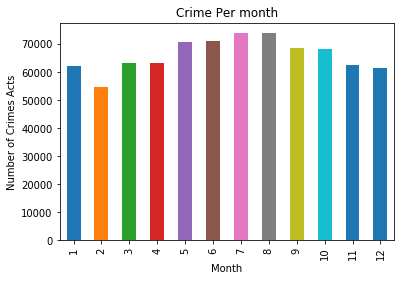

In [18]:
#crimes per month
crimes.groupby([crimes.index.month]).size().plot.bar()
plt.title('Crime Per month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()

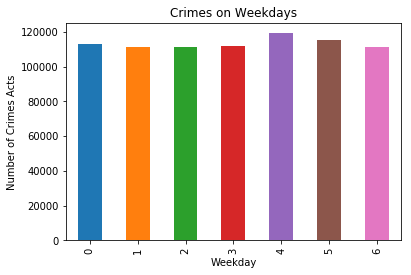

In [23]:
#crimes per weekdayday
crimes.groupby([crimes.index.weekday]).size().plot.bar()
plt.title('Crimes on Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Number of Crimes Acts')
plt.show()

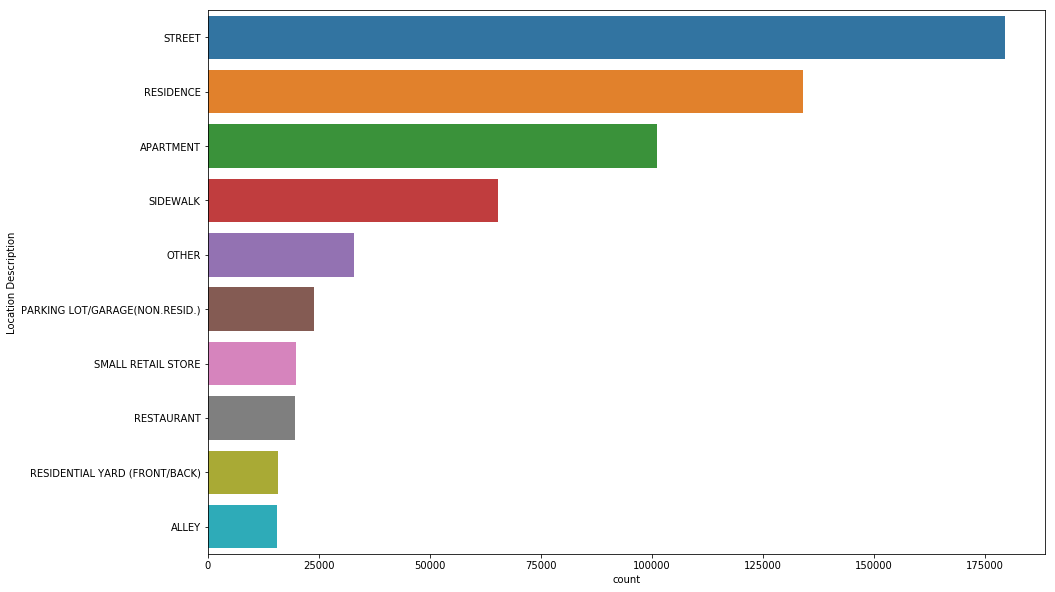

In [25]:
#location of crimes
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = crimes, order = crimes['Location Description'].value_counts().iloc[:10].index)

In [37]:
crimes['LocationCoord'] = crimes['Latitude']+crimes['Longitude']
crimes['valuecount'] = crimes.groupby('LocationCoord').count()[['ID']]

In [51]:
#Trying to create folium maps [work in progress]
chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13)

for i in range(500):
    lat = crimes['Latitude'].iloc[i]
    long = crimes['Longitude'].iloc[i]
    radius = crimes['valuecount'].iloc[i] / 45
    
    if crimes['valuecount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               crimes['valuecount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)


In [52]:
display(chicago_map_crime)